<a href="https://colab.research.google.com/github/parth-awasthi/Text-Summarization-using-Machine-Learning/blob/main/text_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rake-nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk 
nltk.download("stopwords")
nltk.download('punkt')
import string
from heapq import nlargest

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
with open("sampletext.txt","r", encoding="utf8") as f:
    text=f.read()

In [ ]:
print(text)

If the pictures of those towering wildfires in Colorado haven’t convinced you, or the size of your AC bill this summer, here are some hard numbers about climate change: June broke or tied 3,215 high-temperature records across the United States. That followed the warmest May on record for the Northern Hemisphere – the 327th consecutive month in which the temperature of the entire globe exceeded the 20th-century average, the odds of which occurring by simple chance were 3.7 x 10-99, a number considerably larger than the number of stars in the universe.

Meteorologists reported that this spring was the warmest ever recorded for our nation – in fact, it crushed the old record by so much that it represented the “largest temperature departure from average of any season on record.” The same week, Saudi authorities reported that it had rained in Mecca despite a temperature of 109 degrees, the hottest downpour in the planet’s history.

RELATED STORIES
The Flaming Lips, Sheryl Crow, the Roots Le

there are 7133 words in all text.


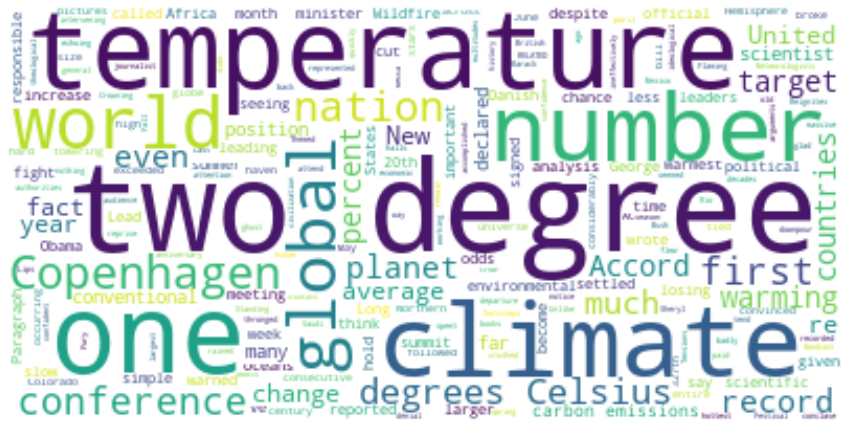

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#print(STOPWORDS)
print("there are {} words in all text.". format(len(text)))

WC=WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(WC,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from rake_nltk import Rake
rk=Rake()

rk.extract_keywords_from_text(text)
extract_keyword=rk.get_ranked_phrases()
extract_keyword

['confident meeting 20 years ago ,”',
 'much .” nasa scientist james hansen',
 'gamble ,” writes kerry emanuel',
 'accord ratified positions taken earlier',
 'political realism bested scientific data',
 'british journalist george monbiot wrote',
 'danish energy minister connie hedegaard',
 'new mexico wildfire reignites long',
 'saving “ copenhagen accord ”',
 'crime scene tonight ,”',
 'purely voluntary agreements committed',
 'intervening decades working ineffectively',
 'airport .” headline writers',
 'since warm air holds',
 'shocking five percent wetter',
 'called major economies forum',
 '“ suicide pact ”',
 'finally hopeless – position',
 '6 degrees fahrenheit –',
 'massive 1992 environmental summit',
 'arithmetical analysis first published',
 '1995 climate conference chaired',
 'number first gained prominence',
 'angry greenpeace official declared',
 'contain one important number',
 'roots lead new climate',
 'small island nations warned',
 'global warming way back',
 'two degr

In [ ]:
print(text.count("."))
print(string.punctuation)
nopuch=[char for char in text if char not in string.punctuation]
nopuch="".join(nopuch)
#print(nopuch)

process_text=[word for word in nopuch.split() if word.lower() not in nltk.corpus.stopwords.words('english')]
#print(process_text)

#create word freq
word_freq={}
for word in process_text:
    if word not in word_freq:
        word_freq[word]=1
    else:
        word_freq[word]=word_freq[word]+1

#dict(sorted(word_freq.items(),key=lambda item:item[1], reverse=True))

max_freq=max(word_freq.values())

for word in word_freq.keys():
    word_freq[word]=(word_freq[word]/max_freq)

#create sent freq
sent_list=nltk.sent_tokenize(text)

sent_score={}
for sent in sent_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_freq.keys():
            if sent not in sent_score.keys():
                sent_score[sent]=word_freq[word]
            else:
                sent_score[sent]=sent_score[sent]+word_freq[word]
                
#dict(sorted(sent_score.items(),key=lambda item:item[1], reverse=True))
       
summary_sent=nlargest(3,sent_score, key=sent_score.get)

summary=" ".join(summary_sent)

summary

54
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'“Any number much above one degree involves a gamble,” writes Kerry Emanuel of MIT, a leading authority on hurricanes, “and the odds become less and less favorable as the temperature goes up.” Thomas Lovejoy, once the World Bank’s chief biodiversity adviser, puts it like this: “If we’re seeing what we’re seeing today at 0.8 degrees Celsius, two degrees is simply too much.” NASA scientist James Hansen, the planet’s most prominent climatologist, is even blunter: “The target that has been talked about in international negotiations for two degrees of warming is actually a prescription for long-term disaster.” At the Copenhagen summit, a spokesman for small island nations warned that many would not survive a two-degree rise: “Some countries will flat-out disappear.” When delegates from developing nations were warned that two degrees would represent a “suicide pact” for drought-stricken Africa, many of them started chanting, “One degree, one Africa.”\n\nDespite such well-founded misgivings, 